In [9]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn.cluster import KMeans

In [111]:
segment_directory = "data/segmentation.csv"
parse_dates = ['Recency']
segment = pd.read_csv(segment_directory, header=0, parse_dates=parse_dates )


In [112]:
segment.count()

CustomerId    16000
Monetary      16000
Recency       16000
Frequency     16000
factor_1      16000
factor_2      16000
factor_3      16000
factor_4      16000
dtype: int64

In [113]:
segment = segment.drop('CustomerId', 1)

In [114]:
max_Recency = max(segment['Recency'])

In [115]:
segment['Recency'] = max_Recency - segment['Recency']

In [116]:
for i in range(len(segment['Recency'])):
    segment.loc[i, 'Recency'] = int(segment.loc[i, 'Recency'].days)
    #df.loc[i, 'date'] = datetime(year=int(dateString[0:4]), month=int(dateString[4:6]), day=int(dateString[6:8]))

In [117]:
segment['Recency'] = segment['Recency'].astype(int)

In [118]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetary   16000 non-null  float64
 1   Recency    16000 non-null  int32  
 2   Frequency  16000 non-null  int64  
 3   factor_1   16000 non-null  float64
 4   factor_2   16000 non-null  float64
 5   factor_3   16000 non-null  float64
 6   factor_4   16000 non-null  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 812.6 KB


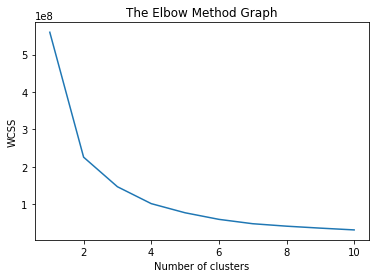

In [119]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(segment)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Оптимальное количество кластеров -> 4

In [120]:
segment.corr().style.background_gradient(cmap='coolwarm')

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
Monetary,1.000000,-0.258633,0.704994,-0.003267,0.000269,-0.004693,0.001962
Recency,-0.258633,1.000000,-0.250237,0.002042,-0.008931,0.012122,-0.001852
Frequency,0.704994,-0.250237,1.000000,0.000180,-0.000392,0.006420,0.005112
factor_1,-0.003267,0.002042,0.000180,1.000000,-0.005630,-0.000411,-0.011337
factor_2,0.000269,-0.008931,-0.000392,-0.005630,1.000000,0.006977,0.011048
factor_3,-0.004693,0.012122,0.006420,-0.000411,0.006977,1.000000,-0.003524
factor_4,0.001962,-0.001852,0.005112,-0.011337,0.011048,-0.003524,1.000000


In [121]:
segment

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,100.40,12,6,0.35,0.08,0.609740,0.949383
1,170.00,22,4,0.66,0.16,0.942272,0.479846
2,70.75,22,6,0.92,0.20,0.323030,0.007076
3,75.00,88,10,0.35,0.78,0.876833,0.088974
4,94.51,67,5,0.51,0.44,0.912099,0.206194
...,...,...,...,...,...,...,...
15995,110.00,16,5,0.22,0.92,0.279858,0.012416
15996,175.00,31,9,0.66,0.55,0.045826,0.025403
15997,94.21,102,2,0.41,0.80,0.438510,0.665808
15998,3.35,162,1,0.75,0.17,0.009277,0.572111


In [122]:
kmeans = KMeans(n_clusters=4, init ='k-means++', n_init=50, random_state=0).fit(segment)

In [123]:
y_kmeans = kmeans.fit_predict(segment)

In [124]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetary   16000 non-null  float64
 1   Recency    16000 non-null  int32  
 2   Frequency  16000 non-null  int64  
 3   factor_1   16000 non-null  float64
 4   factor_2   16000 non-null  float64
 5   factor_3   16000 non-null  float64
 6   factor_4   16000 non-null  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 812.6 KB


In [125]:
kmeans.labels_

array([1, 2, 1, ..., 1, 1, 2])

In [126]:
def showplot(segment, first_feature, second_feature):
    plt.scatter(segment[y_kmeans==0][first_feature], segment[y_kmeans==0][second_feature], s=100, c='red', label ='Cluster 1')
    plt.scatter(segment[y_kmeans==1][first_feature], segment[y_kmeans==1][second_feature], s=100, c='blue', label ='Cluster 2')
    plt.scatter(segment[y_kmeans==2][first_feature], segment[y_kmeans==2][second_feature], s=100, c='green', label ='Cluster 3')
    plt.scatter(segment[y_kmeans==3][first_feature], segment[y_kmeans==3][second_feature], s=100, c='cyan', label ='Cluster 4')
    plt.scatter(segment[y_kmeans==4][first_feature], segment[y_kmeans==4][second_feature], s=100, c='magenta', label ='Cluster 5')
    plt.show()

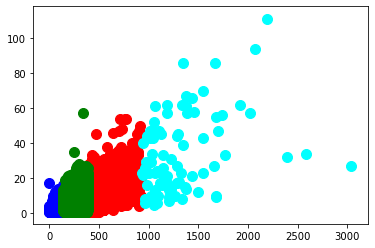

In [127]:
showplot(segment, 'Monetary', 'Frequency')

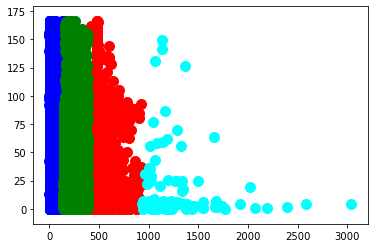

In [128]:
showplot(segment, 'Monetary', 'Recency')

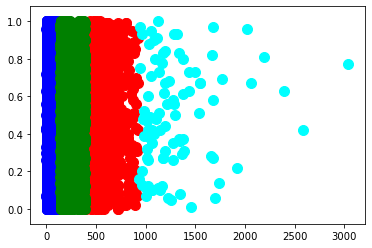

In [129]:
showplot(segment, 'Monetary', 'factor_1')

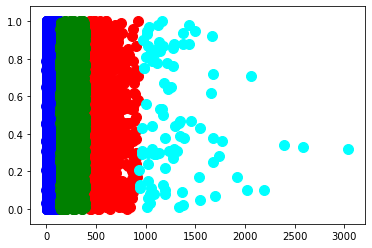

In [130]:
showplot(segment, 'Monetary', 'factor_2')

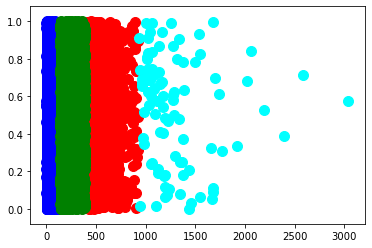

In [131]:
showplot(segment, 'Monetary', 'factor_3')

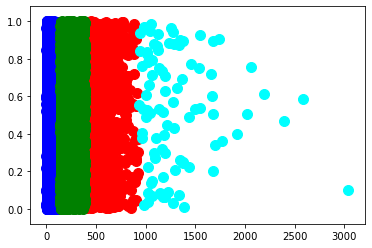

In [132]:
showplot(segment, 'Monetary', 'factor_4')

In [133]:
kmeans.cluster_centers_

array([[5.43599313e+02, 3.52806291e+01, 1.07557947e+01, 4.99271523e-01,
        5.03692053e-01, 4.89613062e-01, 4.88604241e-01],
       [4.54137960e+01, 6.77533589e+01, 2.29322980e+00, 5.01889723e-01,
        4.98160879e-01, 4.95483916e-01, 4.98326925e-01],
       [2.41913171e+02, 3.74062982e+01, 6.44334671e+00, 4.93695585e-01,
        4.95109602e-01, 4.96536934e-01, 5.01609321e-01],
       [1.30547868e+03, 1.92967033e+01, 3.36593407e+01, 4.97472527e-01,
        4.81098901e-01, 5.30096816e-01, 5.28140871e-01]])

### Clusters: 
#### Factor_1 - useless
#### Factor_2 - near useless
#### Factor_3 - better
#### Factor_4 - same as Factor_3